mega test for a paper
1. find distribution of c1 for all cars (set lam2-lam5 to zero)
    a. if the distribution is wide, consider normalizing c1 with the max value
    b. if the distribution is ok, no need to normalize c1
2. normalize other costs c2-c5
    a. set lam1 to some large value and lam_i = 0, then you can get the max ci
3. how to choose lam's after normalization?
    a. solve for each pair (lam1 = 1, lam_i) -> reduce to 2 objectives. find lam_i such that c1+ci is minimized

In [93]:
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pandas as pd
import utils_optimization as opt
importlib.reload(opt)
import data_association as da
importlib.reload(da)
import time
import numpy.linalg as LA

In [94]:
data_path = pathlib.Path().absolute().joinpath('../June_5min')
tform_path = pathlib.Path().absolute().joinpath('../tform')

In [95]:
# rectify one file using the new normalized lambdas

df = utils.read_data(data_path.joinpath('DA/DA_p1c2_0_track_outputs_3D.csv'))
df = utils.img_to_road(df, tform_path,'p1c2')
df = df.groupby("ID").apply(reorder_points).reset_index(drop=True)

# ... rectifying ...
df = opt.rectify(df)

# ... post processing ...
df = utils.post_process(df)

# ... saving ...
df.to_csv(data_path.joinpath('rectified/','p1c2_0_norm'), index=False)
print('saved.')
            

Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 843/843 [27:17<00:00,  1.94s/it]


cap width at 2.59m...
extending tracks to edges of the frame...
121.91405059433099 225.54099359951235


100%|████████████████████████████████████████████████████████████████████████████████| 824/824 [00:13<00:00, 61.35it/s]


standardize format for plotter...
saved.


In [ ]:
n, bins, patches = plt.hist(c5_arr, bins = 80, density=True, alpha=0.75)
plt.grid(True)
# plt.xlim([-100,5000])
plt.title('c5 distribution for p1c2')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


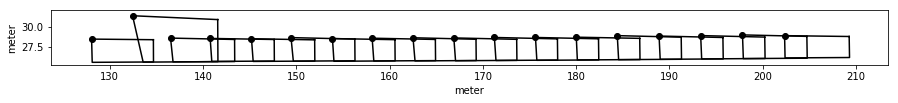

In [3]:
# try normalizing costs one 1min data
df = utils.read_data(data_path.joinpath('DA/DA_p1c2_0_track_outputs_3D.csv'))
# df = df[df['Frame #']<1800]
car = df[df['ID']==139120]
car = utils.img_to_road(car, tform_path,'p1c2')
car = utils.reorder_points(car)
utils.plot_track_df(car)

In [38]:
import utils_optimization as opt
importlib.reload(opt)
lam_arr = [0,0.01,0.02,0.03, 0.04, 0.05,0.06, 0.08, 0.1, 0.2, 0.5, 1]
c1_arr = []
c_arr = []
sum_arr = []

for lam in lam_arr:
    post = car.copy()
    post,c1,c2,c3,c4,c5 = opt.rectify_single_camera(post, 1,0,0,0,lam) # this is normalized costs
    c1_arr.append(c1)
    c_arr.append(c5)
    sum_arr.append(c1+c5)

C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:121: RuntimeWarning: invalid value encountered in less
  invalid = invalid | (meas<q1) | (meas>q3)
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:121: RuntimeWarning: invalid value encountered in greater
  invalid = invalid | (meas<q1) | (meas>q3)


Text(0,0.5,'sum')

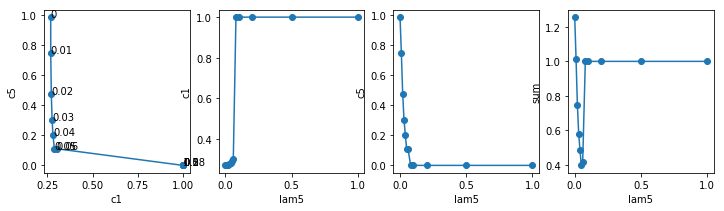

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,3))
ax1.plot(c1_arr, c_arr,'o-')
ax1.set_xlabel('c1')
ax1.set_ylabel('c5')
for i, txt in enumerate(lam_arr):
    ax1.annotate(txt, (c1_arr[i], c_arr[i]))

    
ax2.plot(lam_arr, c1_arr,'o-')
ax2.set_xlabel('lam5')
ax2.set_ylabel('c1')

ax3.plot(lam_arr, c_arr,'o-')
ax3.set_xlabel('lam5')
ax3.set_ylabel('c5')

ax4.plot(lam_arr, sum_arr,'o-')
ax4.set_xlabel('lam5')
ax4.set_ylabel('sum')

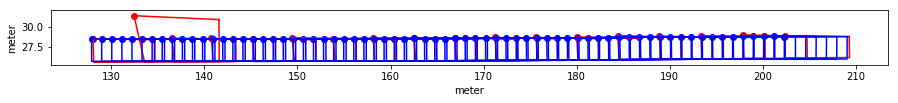

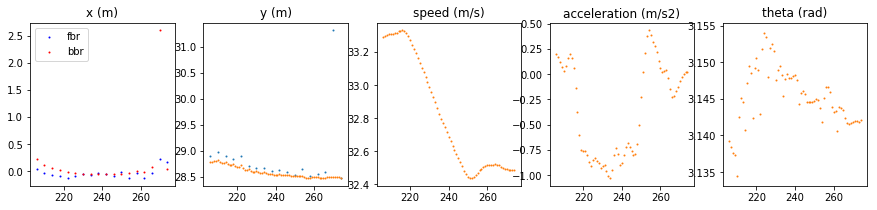

In [80]:
utils.plot_track_compare(car,post)
utils.dashboard([car,post])

In [79]:
import utils_optimization as opt
importlib.reload(opt) 
post = car.copy()
post,c1,c2,c3,c4,c5 = opt.rectify_single_camera(post, 1,0.2,0.2,0.05,0.02)

C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:121: RuntimeWarning: invalid value encountered in less
  invalid = invalid | (meas<q1) | (meas>q3)
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:121: RuntimeWarning: invalid value encountered in greater
  invalid = invalid | (meas<q1) | (meas>q3)


before norm 0.7409559280506824 0.0547248603988825 0.07739198584499152 0.007234804707317999 0.006478577995640766
after norm 0.28282788301012174 0.22496076091035028 0.0256463724934894 0.47195933707434523 0.2632593987717754
